In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1368 - accuracy: 0.9586 - val_loss: 0.0501 - val_accuracy: 0.9827
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0397 - val_accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0367 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0310 - val_accuracy: 0.9907


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 [==============================] - 4s 12ms/step - loss: 0.0310 - accuracy: 0.9907
Test Accuracy: 0.9907000064849854


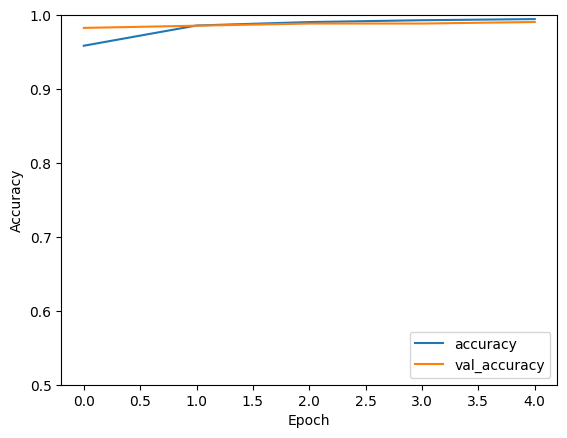

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [8]:
model.save('mnist_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
